<a href="https://colab.research.google.com/github/mukteshsingh95/Rossmann-Sales-Prediction/blob/main/Rossmann_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# installing lime package
!pip install lime


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283858 sha256=33daee1fa6a4d7e8874570ecb82ab174648da547d8dc05cb382a50606d0729f0
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [2]:
#import module
import pandas as pd #for data manipulation and analysis
import numpy as np # for manipulation of multi-dimensional arrays and matrices
import matplotlib.pyplot as plt # for data visualization and graphical plotting
import seaborn as sns # for data visualization
from sklearn.model_selection import train_test_split #sklearn-- for machine learning algorithms
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 
import lime # library for measuring feature importance
import warnings
warnings.filterwarnings('ignore')

In [3]:
# installing ELI5
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107746 sha256=855243672a1e6eb55edf1d64fdfbc91eca319c730453e583a9a376e4b2495b43
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


In [4]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
#loading Dataset
Rossmann_df=pd.read_csv("/content/drive/MyDrive/DATA/Rossmann Stores Data.csv")
store_df=pd.read_csv("/content/drive/MyDrive/DATA/store (1).csv")

# EDA
**1.Rossmann Stores Dataset**

In [6]:
#Checking the shape of Rossmann Stores dataset
Rossmann_df.shape


(1017209, 9)

In [7]:
# Information about different column of the dataset
Rossmann_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
#First 5 rows of Rossmann_df dataset
Rossmann_df.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


# **2. Store_df Dataset**

In [8]:
#Checking the shape of Stores dataset
store_df.shape


(1115, 10)

In [ ]:
# Information about different column of the dataset
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
#Checking null values in the store_df dataset
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
#Top five observation of the dataset
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
#merging both dataset
merged_df=Rossmann_df.merge(store_df, how='left', on="Store")

In [ ]:
#Shape of merged dataset
merged_df.shape

(1017209, 18)

In [ ]:
# Information about different column of the Dataset
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [18]:
#Checking null values in the merged_df dataset
merged_df.isnull().sum()


Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Date-time                         0
year                              0
month                             0
day                               0
current_week_number               0
dtype: int64

In combine dataset "CompetitionDistance" coloumn has 2642 null value. "CompetitionOpenSinceMonth" coloumn has 323348 null value. "CompetitionOpenSinceYear" coloumn has 323348 null value. "Promo2SinceWeek" coloumn has 508031 null value. "Promo2SinceYear" coloumn has 508031 null value. "PromoInterval" coloumn has 508031 null value.

In [19]:
#description of sales,customers and competition distance respectively
merged_df.describe()[['Sales','Customers','CompetitionDistance']]

,Sales,Customers,CompetitionDistance
count,1.017209e+06,1.017209e+06,1.014567e+06
mean,5.773819e+03,6.331459e+02,5.430086e+03
std,3.849926e+03,4.644117e+02,7.715324e+03
min,0.000000e+00,0.000000e+00,2.000000e+01
25%,3.727000e+03,4.050000e+02,7.100000e+02
50%,5.744000e+03,6.090000e+02,2.330000e+03
75%,7.856000e+03,8.370000e+02,6.890000e+03
max,4.155100e+04,7.388000e+03,7.586000e+04


The above chart shows mimimum, 25 percentile,50 percentile, 75 percentile and mximum values of the sales, number of customers and competition distance respectively.

# Analysing categorial columns

In [10]:
#Description of categorical column
categorical_df=merged_df.loc[:, ~merged_df.columns.isin(['Sales','Customers','CompetitionDistance','Store','Date'])]
     

In [11]:
#Value counts of each categorical column
for item in categorical_df.columns:
  valuecount_df=pd.DataFrame(categorical_df[item].value_counts().reset_index())
  valuecount_df.rename(columns = {'index':'uniue_values',item:"Count"}, inplace = True)
  print(f'Value Count Of {item} Column :\n\n{valuecount_df}\n')

Value Count Of DayOfWeek Column :

   uniue_values   Count
0             5  145845
1             4  145845
2             3  145665
3             2  145664
4             1  144730
5             7  144730
6             6  144730

Value Count Of Open Column :

   uniue_values   Count
0             1  844392
1             0  172817

Value Count Of Promo Column :

   uniue_values   Count
0             0  629129
1             1  388080

Value Count Of StateHoliday Column :

  uniue_values   Count
0            0  855087
1            0  131072
2            a   20260
3            b    6690
4            c    4100

Value Count Of SchoolHoliday Column :

   uniue_values   Count
0             0  835488
1             1  181721

Value Count Of StoreType Column :

  uniue_values   Count
0            a  551627
1            d  312912
2            c  136840
3            b   15830

Value Count Of Assortment Column :

  uniue_values   Count
0            a  537445
1            c  471470
2            b    82

In [12]:
#change datatype to int type
merged_df['StateHoliday'].replace({'0':0}, inplace=True)

In [13]:
#extracting current day, month, year, current week number from "date" column
def object_to_datetime(df):
  df["Date-time"]=pd.to_datetime(df['Date'])
  df['year'] = pd.DatetimeIndex(df['Date-time']).year
  df['month'] = pd.DatetimeIndex(df['Date-time']).month
  df['day'] = pd.DatetimeIndex(df['Date-time']).day
  df['current_week_number']=df["Date-time"].dt.week
  return df

In [15]:
merged_df=object_to_datetime(merged_df)
     

# Data Visualization
Daily average sales in terms of day of week, Daily average sales in terms of month of year, Daily average sales in terms year.

In [20]:
#finding daily average sales
avg_sale_day=merged_df.groupby('DayOfWeek').agg({'Sales':'mean'}).reset_index()
avg_sale_month=merged_df.groupby('month').agg({'Sales':'mean'}).reset_index()
avg_sale_year=merged_df.groupby('year').agg({'Sales':'mean'}).reset_index()

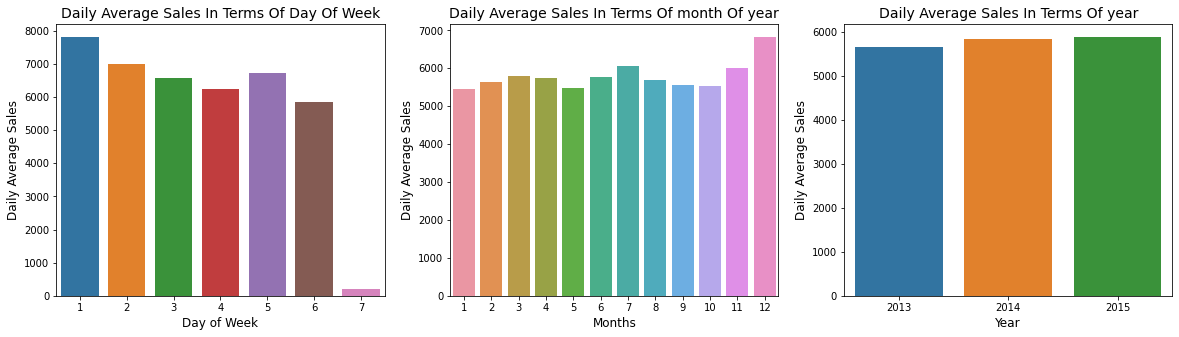

In [21]:
# plotting bar chart of Daily average sales in terms of day of week, Daily average sales in terms of month of year, Daily average sales in terms year.
fig, axes = plt.subplots(1, 3,figsize=(20,5));

sns.barplot(avg_sale_day['DayOfWeek'],avg_sale_day['Sales'],ax=axes[0]);
axes[0].set_title("Daily Average Sales In Terms Of Day Of Week",fontsize=14);
axes[0].set_ylabel("Daily Average Sales",fontsize=12);
axes[0].set_xlabel("Day of Week",fontsize=12);
sns.barplot(avg_sale_month['month'],avg_sale_month['Sales'],ax=axes[1]);
axes[1].set_title("Daily Average Sales In Terms Of month Of year",fontsize=14);
axes[1].set_ylabel("Daily Average Sales",fontsize=12);
axes[1].set_xlabel("Months",fontsize=12);
sns.barplot(avg_sale_year['year'],avg_sale_year['Sales'],ax=axes[2]);
axes[2].set_title("Daily Average Sales In Terms Of year",fontsize=14);
axes[2].set_ylabel("Daily Average Sales",fontsize=12);
axes[2].set_xlabel("Year",fontsize=12);

# Observation:
Among the 3 bar graphs

* First represents daily average sales in terms of day of week. Values 1-7 represent each day of the week. On day 7 the sales are very low because most of the stores are closed as it is sunday. Sales are high on monday, most probably because many stores are closed on sunday.

* Second represents daily average sales in terms of month of year. Month 12 that is december has the highest sales.

* Third represents daily average sales in terms of year.

# Sales in terms of shop open or close, Sales in terms of Promo availble or not

Text(0.5, 0, 'Promo Availability')

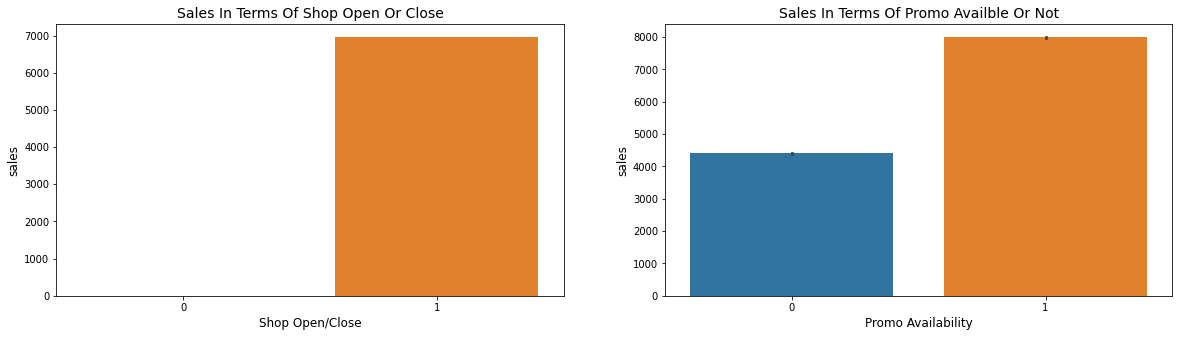

In [22]:
#Plotting bar chart of Sales in terms of shop open or close, Sales in terms of Promo availble or not
fig, axes = plt.subplots(1, 2,figsize=(20,5));
sns.barplot(merged_df['Open'],merged_df['Sales'],ax=axes[0]);
axes[0].set_title("Sales In Terms Of Shop Open Or Close",fontsize=14);
axes[0].set_ylabel("sales",fontsize=12);
axes[0].set_xlabel("Shop Open/Close",fontsize=12);
sns.barplot(merged_df['Promo'],merged_df['Sales'],ax=axes[1]);
axes[1].set_title("Sales In Terms Of Promo Availble Or Not",fontsize=14);
axes[1].set_ylabel("sales",fontsize=12);
axes[1].set_xlabel("Promo Availability",fontsize=12)

# Observation:
* First graph shows sales in terms of shop open or close. 0 represents shop is basically closed so there is no sale on that day.
* Second graph shows sales In terms of promo availble or not. Sales are pretty high when promo is available.

# Sales in terms of Store Type, Sales in terms of Assortment

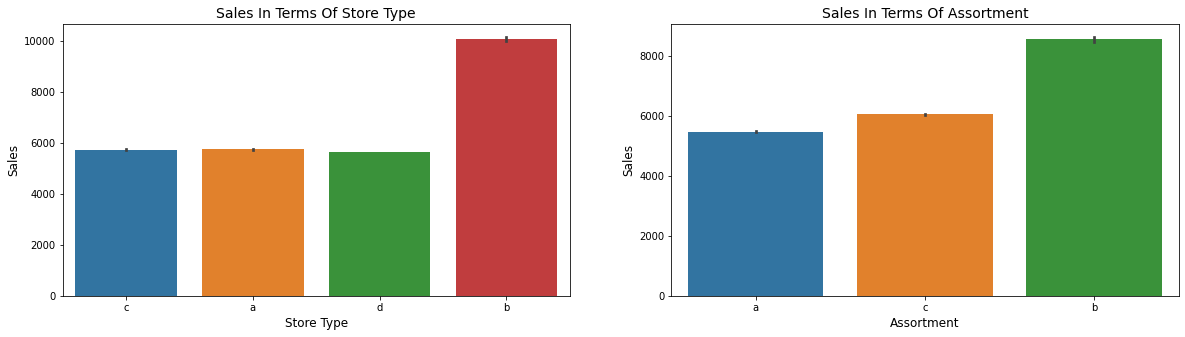

In [23]:
# Plotting bar chart of Sales in terms of Store Type, Sales in terms of Assortment
fig, axes = plt.subplots(1, 2,figsize=(20,5));
sns.barplot(merged_df['StoreType'],merged_df['Sales'],ax=axes[0]);
axes[0].set_title("Sales In Terms Of Store Type",fontsize=14);
axes[0].set_ylabel("Sales",fontsize=12);
axes[0].set_xlabel("Store Type",fontsize=12);
sns.barplot(merged_df['Assortment'],merged_df['Sales'],ax=axes[1]);
axes[1].set_title("Sales In Terms Of Assortment",fontsize=14);
axes[1].set_ylabel("Sales",fontsize=12);
axes[1].set_xlabel("Assortment",fontsize=12);

# Observation:

* Graph 1 - On an average store type B had the highest sales. There must be something different about this store type.

* Graph 2 - Highest average sales were seen with Assortment levels-b which is 'extra'.

# Sales VS Promo2, Sales VS Promo2SinceYear

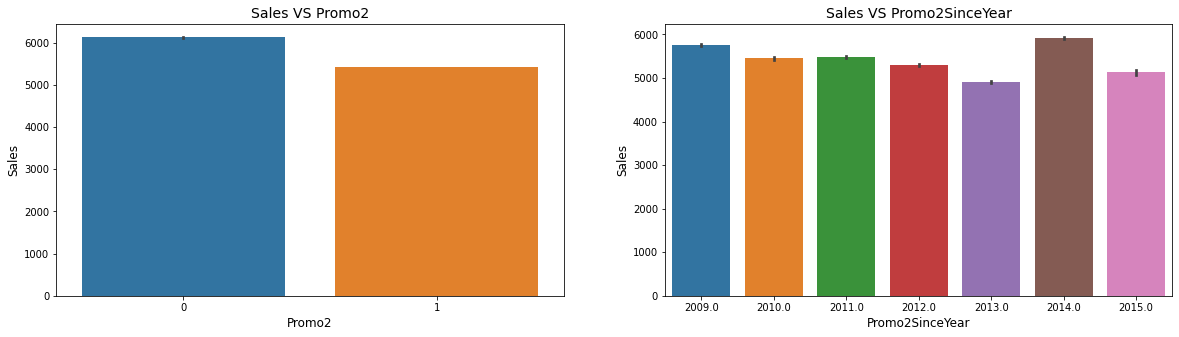

In [24]:
# Plotting bar garph of Sales VS Promo2, Sales VS Promo2SinceYear
fig, axes = plt.subplots(1, 2,figsize=(20,5));
sns.barplot(merged_df['Promo2'],merged_df['Sales'],ax=axes[0]);
axes[0].set_title("Sales VS Promo2",fontsize=14);
axes[0].set_ylabel("Sales",fontsize=12);
axes[0].set_xlabel("Promo2",fontsize=12);
sns.barplot(merged_df['Promo2SinceYear'],merged_df['Sales'],ax=axes[1]);
axes[1].set_title("Sales VS Promo2SinceYear",fontsize=14);
axes[1].set_ylabel("Sales",fontsize=12);
axes[1].set_xlabel("Promo2SinceYear",fontsize=12);

# Observation:
* Graph 1 - With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.

* Graph 2 - Describes the year when the store started participating in Promo2.

# Percentage distribution of storetype and assortment in terms of sales and customer

In [25]:
# Creating dataframes storetype_vs_sale, storetype_vs_customer, storetype_value_count
storetype_vs_sale=merged_df.groupby('StoreType').agg({'Sales':'sum'}).reset_index().sort_values(by='Sales')
storetype_vs_customer=merged_df.groupby('StoreType').agg({'Customers':'sum'}).reset_index().sort_values(by='Customers')
storetype_value_count=merged_df['StoreType'].value_counts().reset_index().sort_values(by='StoreType')


In [26]:
# Creating dataframes assortment_vs_sale, assortment_vs_customer, assortment_value_count 
assortment_vs_sale=merged_df.groupby('Assortment').agg({'Sales':'sum'}).reset_index().sort_values(by='Sales')
assortment_vs_customer=merged_df.groupby('Assortment').agg({'Customers':'sum'}).reset_index().sort_values(by='Customers')
assortment_value_count=merged_df['Assortment'].value_counts().reset_index().sort_values(by='Assortment')

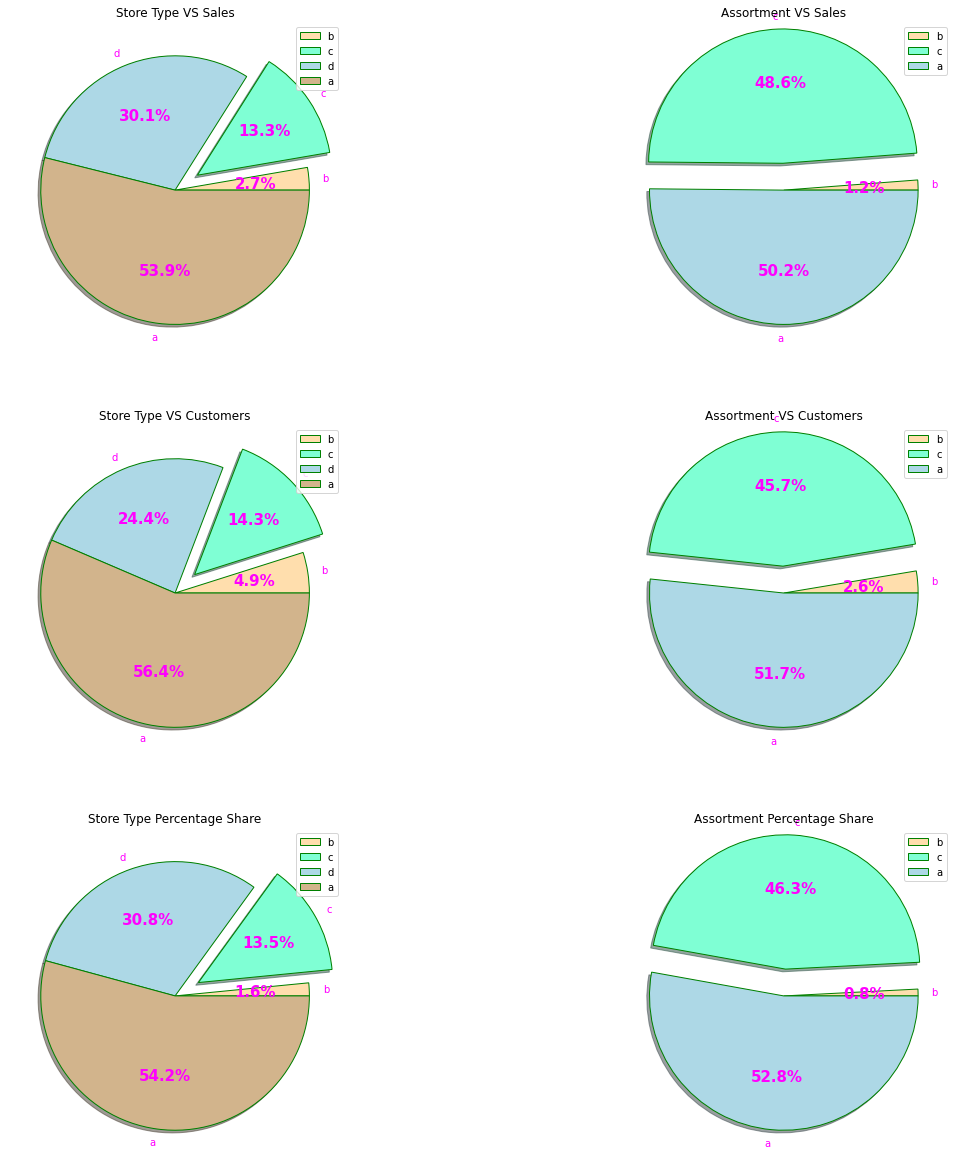

In [27]:
# Pie chart for Percentage distribution of storetype and assortment in terms of sales and customer
explode = (0, 0.2, 0,0)
labels = 'b', 'c', 'd','a'
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
fig, ax = plt.subplots(3,2,figsize =(20, 21))
wedges, texts, autotexts=ax[0][0].pie(data=storetype_vs_sale,x='Sales',labels=labels,autopct='%1.1f%%',shadow=True,explode=explode,colors=['navajowhite','aquamarine','lightblue','tan'],wedgeprops = wp,textprops = dict(color ="magenta"))
plt.setp(autotexts, size = 15, weight ="bold")
ax[0][0].legend( loc=1);
ax[0][0].set_title("Store Type VS Sales");


wedges, texts, autotexts=ax[1][0].pie(data=storetype_vs_customer,x='Customers',labels=labels,autopct='%1.1f%%',shadow=True,explode=explode,colors=['navajowhite','aquamarine','lightblue','tan'],wedgeprops = wp,textprops = dict(color ="magenta"))
plt.setp(autotexts, size = 15, weight ="bold")
ax[1][0].legend( loc=1);
ax[1][0].set_title("Store Type VS Customers");


wedges, texts, autotexts=ax[2][0].pie(data=storetype_value_count,x='StoreType',labels=labels,autopct='%1.1f%%',shadow=True,explode=explode,colors=['navajowhite','aquamarine','lightblue','tan'],wedgeprops = wp,textprops = dict(color ="magenta"))
plt.setp(autotexts, size = 15, weight ="bold")
ax[2][0].legend( loc=1);
ax[2][0].set_title("Store Type Percentage Share");


explod = (0, 0.2, 0)
label = 'b', 'c','a'
wedges, texts, autotexts=ax[0][1].pie(data=assortment_vs_sale,x='Sales',labels=label,autopct='%1.1f%%',shadow=True,explode=explod,colors=['navajowhite','aquamarine','lightblue'],wedgeprops = wp,textprops = dict(color ="magenta"))
plt.setp(autotexts, size = 15, weight ="bold")
ax[0][1].legend( loc=1);
ax[0][1].set_title("Assortment VS Sales");

wedges, texts, autotexts=ax[1][1].pie(data=assortment_vs_customer,x='Customers',labels=label,autopct='%1.1f%%',shadow=True,explode=explod,colors=['navajowhite','aquamarine','lightblue'],wedgeprops = wp,textprops = dict(color ="magenta"))
plt.setp(autotexts, size = 15, weight ="bold")
ax[1][1].legend( loc=1);
ax[1][1].set_title("Assortment VS Customers");

wedges, texts, autotexts=ax[2][1].pie(data=assortment_value_count,x='Assortment',labels=label,autopct='%1.1f%%',shadow=True,explode=explod,colors=['navajowhite','aquamarine','lightblue'],wedgeprops = wp,textprops = dict(color ="magenta"))
plt.setp(autotexts, size = 15, weight ="bold")
ax[2][1].legend( loc=1);
ax[2][1].set_title("Assortment Percentage Share");

# Observation:
* A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle. Earlier it was seen that the store type 'b' had the highest sales on an average because the default estimation function to the barplot is mean.
* But upon further exploration it can be clearly observed that the highest sales belonged to the store type 'a' due to the high number of type 'a' stores in our dataset. Store type 'a' and 'c' had a similar kind of sales and customer share.
* Along with store types, there are charts of assortment which shows behaviour of different assortment types against sales, customer share and assortment percentage share.

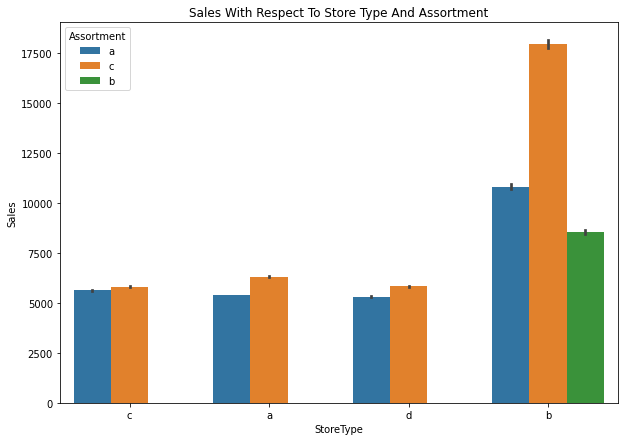

In [28]:
#sales for each storetype and assortment
plt.figure(figsize=(10,7))
sns.barplot(x=merged_df["StoreType"],y=merged_df['Sales'],hue=merged_df["Assortment"]); 
plt.title("Sales With Respect To Store Type And Assortment");


# Observation:

Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved. On the other hand store type a, c and d have only assortment level a and c.

<AxesSubplot:xlabel='Open', ylabel='Sales'>

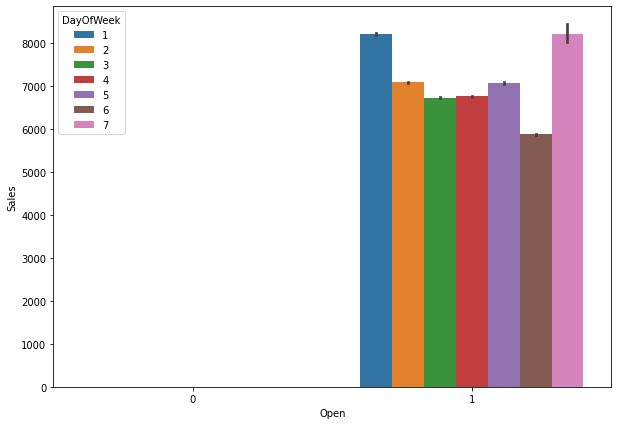

In [29]:
# open and storetype relationship 
#this indicates - Open suggests that whether the store was open or closed for refurbishment and weekends or holidays
plt.figure(figsize=(10,7))
sns.barplot(x=merged_df["Open"],y=merged_df['Sales'],hue=merged_df["DayOfWeek"])

<AxesSubplot:xlabel='Open', ylabel='count'>

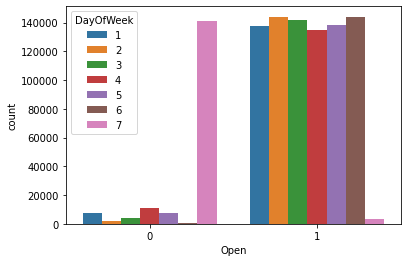

In [30]:
#Lets see open, how many shops are open on which days 
#and this gives a counts of stores closed for refurbishment and suggests that most stores are closed on sunday
sns.countplot(x=merged_df["Open"], hue=merged_df["DayOfWeek"])

# Monthly sales for each year

In [31]:
sales_2013_by_month = merged_df[merged_df['year']== 2013].groupby('month').agg({'Sales':'sum'}).reset_index()
sales_2014_by_month = merged_df[merged_df['year']==2014].groupby('month').agg({'Sales':'sum'}).reset_index()
sales_2015_by_month = merged_df[merged_df['year']== 2015].groupby('month').agg({'Sales':'sum'}).reset_index()

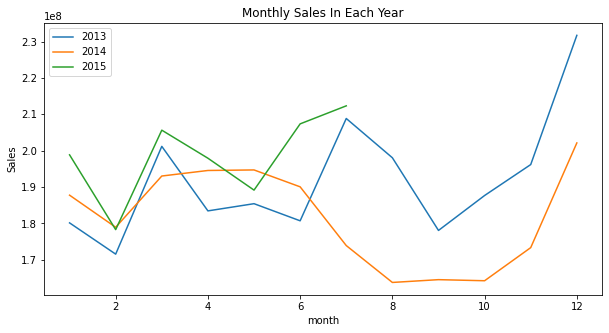

In [32]:
# Monthly sales in each year 
plt.figure(figsize=(10,5))
sns.lineplot(data=sales_2013_by_month, x="month", y="Sales",label='2013')
sns.lineplot(data=sales_2014_by_month, x="month", y="Sales",label='2014')
sns.lineplot(data=sales_2015_by_month, x="month", y="Sales",label='2015');
plt.title("Monthly Sales In Each Year");

# **Observation:**
Sales rise up by the end of the year before the holidays. Sales of 2014 went down for a couple of months - July to September, indicating stores closed due to refurbishment.

# Monthly sales in terms of store type

Text(0.5, 1.0, 'Monthly Sales Per Store Type')

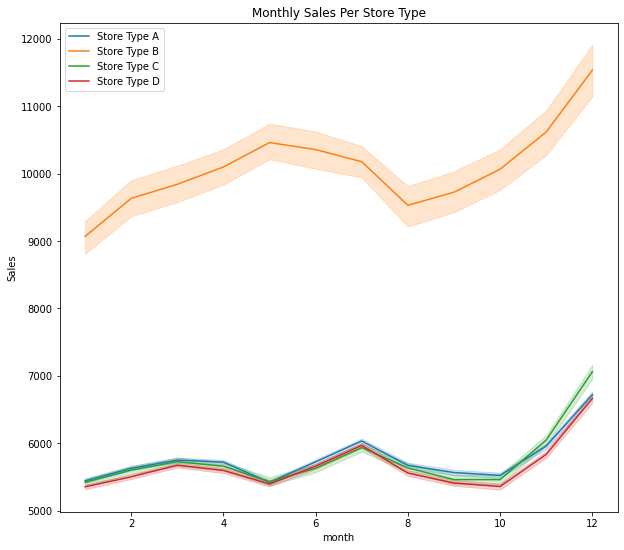

In [33]:
#Monthly sales per store type
plt.subplots(figsize = (10, 9))
sns.lineplot(x = merged_df[merged_df.StoreType == 'a'].month, y = merged_df[merged_df.StoreType == 'a'].Sales, label="Store Type A");
sns.lineplot(x = merged_df[merged_df.StoreType == 'b'].month, y = merged_df[merged_df.StoreType == 'b'].Sales, label="Store Type B");
sns.lineplot(x = merged_df[merged_df.StoreType == 'c'].month, y = merged_df[merged_df.StoreType == 'c'].Sales, label="Store Type C");
sns.lineplot(x = merged_df[merged_df.StoreType == 'd'].month, y = merged_df[merged_df.StoreType == 'd'].Sales, label="Store Type D");
plt.title("Monthly Sales Per Store Type")


# Observation:

Line plot shows monthly sales per store type.

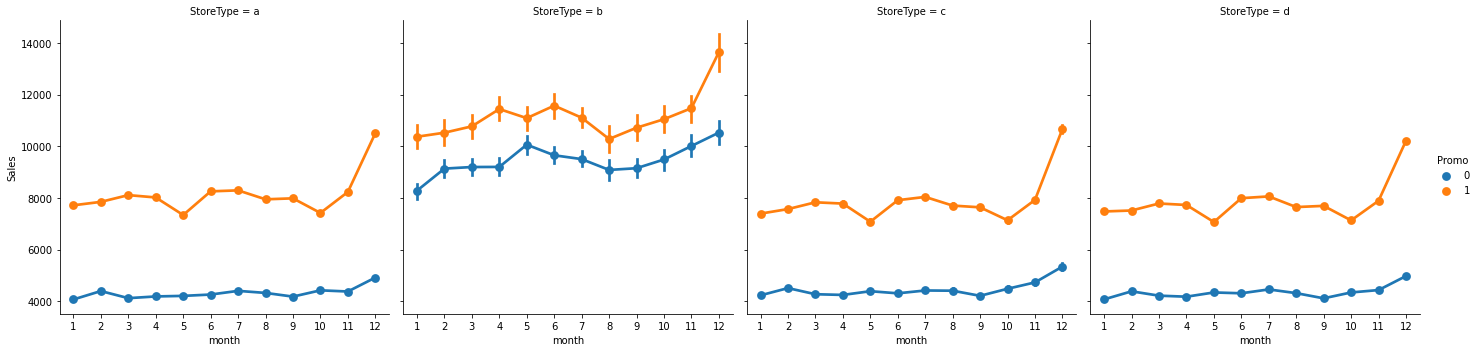

In [34]:
#Monthly sales in terms of StoreType and Promo
sns.factorplot(data = merged_df, x = 'month', y = "Sales",col = 'StoreType',hue = 'Promo',col_order=['a','b','c', 'd']);


# Observation:
* Store type b has the highest monthly sales.
* When there is promo sales of all storeType increases.

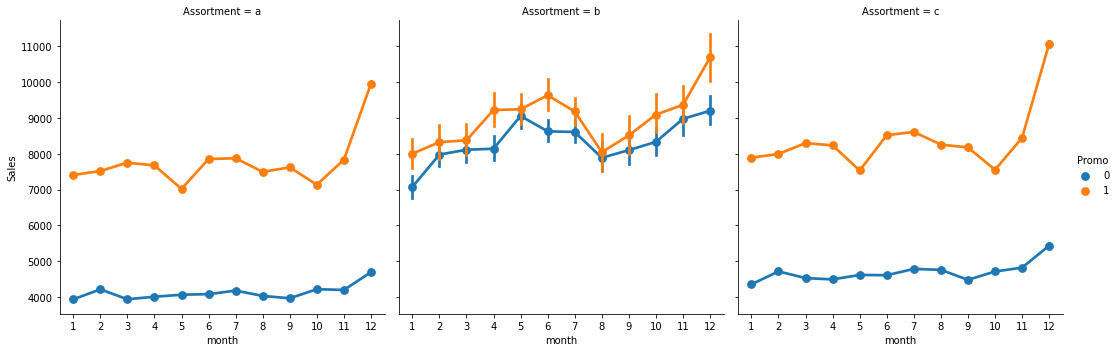

In [35]:
#Monthly sales in terms of Assortment and Promo
sns.factorplot(data = merged_df, x = 'month', y = "Sales",col = 'Assortment',hue = 'Promo',col_order=['a','b','c']);

# **Observation:**
* Assortment b has the highest monthly sales.
* When there is promo sales of all assortment increases.

## Pair plot of Sales,Customers,and Competition

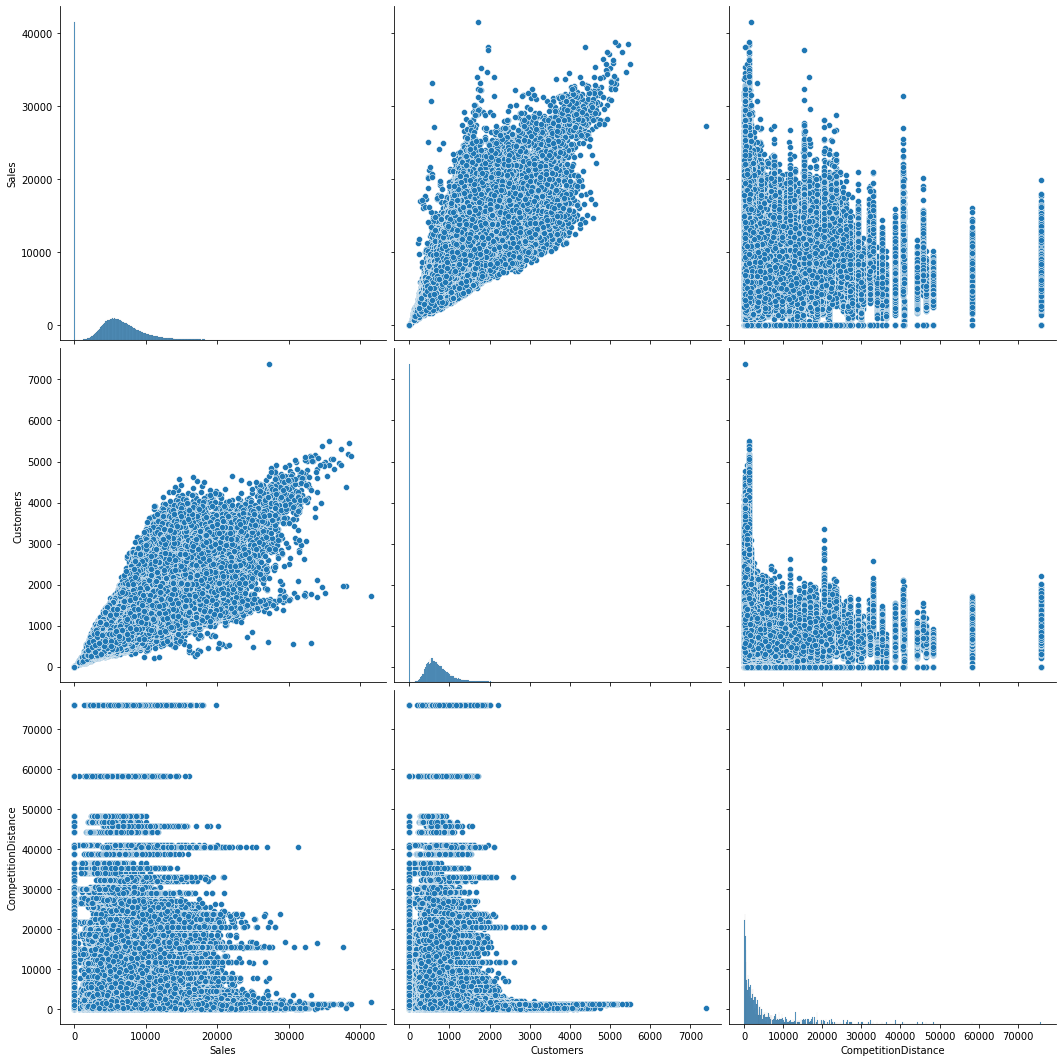

In [36]:
#pair plot of Sales,Customers,and Competition Distance
sns.pairplot(merged_df[['Sales','Customers','CompetitionDistance']],kind='scatter',size=5);

# **Observation:**

* Though customers and sales are not completely linear, the customer shows some lineraity with sales.
* Sales increase with decrease in competition distance.

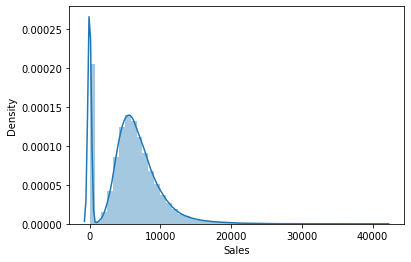

In [37]:
#distribution of Sales
sns.distplot(merged_df['Sales']);


# Observation:

The drop in sales indicates the 0 sales accounting to the stores temporarily closed due to refurbishment.

In [38]:
#correlation matrix
merged_df.columns
column=['Store','Date','DayOfWeek','StateHoliday','StoreType','Assortment','Date-time']

In [39]:
correlation_df = merged_df.drop(columns =column, axis =1)


<AxesSubplot:>

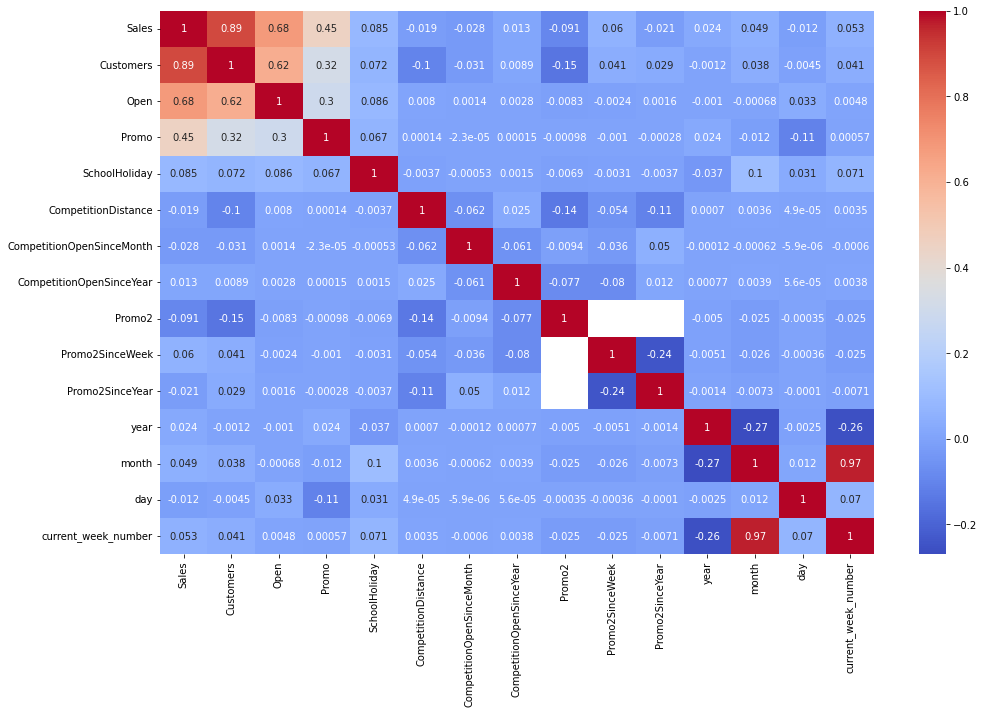

In [40]:
#Plotting heatmap of correlation
plt.figure(figsize=(16,10))
sns.heatmap(correlation_df.corr(), cmap="coolwarm", annot=True)

# **Observation:**

* Most of the features are weakly corelated.
* Some features like open and customer, month and current weak number have strong corelation.

# **Data manipulation and Feature engineering**

# Let's check the Rossmann_df dataset

In [41]:
# Checking  columns of merged dataset 
merged_df.columns


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Date-time', 'year', 'month', 'day',
       'current_week_number'],
      dtype='object')

## **Feature Engineering**

In [42]:
#Since the Sales is 0 for closed store lets not include the observations where store is closed 
merged_df['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [43]:
# check sales for close store columns 
merged_df[merged_df['Open']==0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Date-time,year,month,day,current_week_number
291,292,5,2015-07-31,0,0,0,1,0,1,a,...,2009.0,0,NaN,NaN,NaN,2015-07-31,2015,7,31,31
875,876,5,2015-07-31,0,0,0,1,0,1,a,...,2005.0,1,18.0,2015.0,"Feb,May,Aug,Nov",2015-07-31,2015,7,31,31
1406,292,4,2015-07-30,0,0,0,1,0,1,a,...,2009.0,0,NaN,NaN,NaN,2015-07-30,2015,7,30,31
1990,876,4,2015-07-30,0,0,0,1,0,1,a,...,2005.0,1,18.0,2015.0,"Feb,May,Aug,Nov",2015-07-30,2015,7,30,31
2521,292,3,2015-07-29,0,0,0,1,0,1,a,...,2009.0,0,NaN,NaN,NaN,2015-07-29,2015,7,29,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013-01-01,2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,2006.0,0,NaN,NaN,NaN,2013-01-01,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,0,NaN,NaN,NaN,2013-01-01,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,0,NaN,NaN,NaN,2013-01-01,2013,1,1,1


In [44]:
#when stores are closed sales will be zero so lets model the rows when store is open
merge_df_1=merged_df[merged_df['Open']==1].copy()

In [45]:
#shape of the dataset where store is open
merge_df_1.shape

(844392, 23)

In [46]:
# Information of merged_df_1 dataframe
merge_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  object        
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Open                       844392 non-null  int64         
 6   Promo                      844392 non-null  int64         
 7   StateHoliday               844392 non-null  object        
 8   SchoolHoliday              844392 non-null  int64         
 9   StoreType                  844392 non-null  object        
 10  Assortment                 844392 non-null  object        
 11  CompetitionDistance        842206 non-null  float64

## Combine CompetitionOpenSinceMonth, CompetitionOpenSinceYear to give "competition_open"

In [47]:
#Combine CompetitionOpenSinceMonth, CompetitionOpenSinceYear to give "competition_open"(since how many months competition is open)
def competition_open(df):
  '''This function tells since how many months competition is open '''
  df["competition_open"]=12*(df.year-df.Promo2SinceYear)+(df.month-df.CompetitionOpenSinceMonth)
  df['competition_open'] = df['competition_open'].map(lambda x: 0 if x < 0 else x).fillna(0)
  return df
     

In [48]:
merge_df_1=competition_open(merge_df_1)


In [49]:
# Checking shape of merged dataset
merge_df_1.shape

(844392, 24)

# Combine Promo2SinceWeek, Promo2SinceYear to give "promo_2_open"

In [50]:
# Combine Promo2SinceWeek, Promo2SinceYear to give "promo_2_open"(since how many months the shop is participating in promo2)
def promo_2_open(df):
  '''This function tells since how many months the shop is participating in promo2 '''
  df["promo_2_open"]=12*(df.year-df.Promo2SinceYear)+(df.current_week_number-df.Promo2SinceWeek)*7/30.5
  df['promo_2_open'] = df['promo_2_open'].map(lambda x: 0 if x < 0 else x).fillna(0)*df['Promo2']
  return df


In [51]:
merge_df_1=promo_2_open(merge_df_1)


# Handling "PromoInterval" coloumn

In [52]:
# Filling null values of"PromoInterval" coloumn
merge_df_1['PromoInterval']=merge_df_1['PromoInterval'].fillna(0)

In [53]:
#Mapping month name to numbers
month_dict={"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6, "Jul": 7, "Aug": 8, "Sept": 9, "Oct": 10, "Nov": 11, "Dec": 12}

In [54]:
def PromoInterval(x):
  '''Converting object type of month to list'''
  if x!=0:
    x=str(x)
    month_list=[]
    months=x.split(',')
    for i in months:
      month_list.append(month_dict[i])
    return month_list

  else:
    return x


In [55]:
merge_df_1['promo_intervel_open']=merge_df_1['PromoInterval'].apply(lambda x:PromoInterval(x))


In [56]:
def promotion_intervel(row):
  '''Function to check if promo interval 
  is open for a particular month'''
  if row['promo_intervel_open']!=0:
    if row['month'] in row['promo_intervel_open']:
      return 1
    else:
      return 0
  else:
    return 0

In [57]:
merge_df_1['IsPromo2Month']=merge_df_1.apply(promotion_intervel,axis=1)

In [58]:
#checking the shape
merge_df_1.shape

(844392, 27)

In [59]:
#Checking all the columns of merge_df_1 dataset
merge_df_1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Date-time', 'year', 'month', 'day',
       'current_week_number', 'competition_open', 'promo_2_open',
       'promo_intervel_open', 'IsPromo2Month'],
      dtype='object')

In [60]:
#Separating between independent and dependent variables
input_col=['Store','DayOfWeek','Customers','Promo','StateHoliday','SchoolHoliday','year','month','day',
           'current_week_number','StoreType','Assortment','CompetitionDistance','Promo2','competition_open','promo_2_open','IsPromo2Month']
target_col='Sales_transformed'

# **Handling null values**

In [61]:
#Checking null values for independent variables
merge_df_1[input_col].isna().sum()


Store                     0
DayOfWeek                 0
Customers                 0
Promo                     0
StateHoliday              0
SchoolHoliday             0
year                      0
month                     0
day                       0
current_week_number       0
StoreType                 0
Assortment                0
CompetitionDistance    2186
Promo2                    0
competition_open          0
promo_2_open              0
IsPromo2Month             0
dtype: int64

# **Observation**
CompetitionDistance has 2186 null values

In [62]:
#Description of Competition Distance
merge_df_1['CompetitionDistance'].describe()

count    842206.000000
mean       5457.979627
std        7809.437311
min          20.000000
25%         710.000000
50%        2320.000000
75%        6890.000000
max       75860.000000
Name: CompetitionDistance, dtype: float64

<AxesSubplot:>

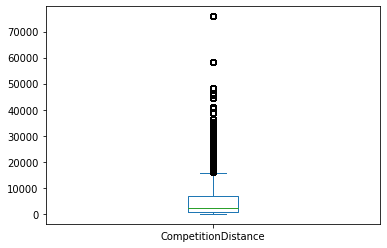

In [63]:
#Box plot of Competition Distance
merge_df_1['CompetitionDistance'].plot.box()


# **Observation**
CompetitionDistance has so many outliers and containes some null values. So we will fill the null values using median because mean is affected by outliers.

In [64]:
#Filling null values using median
median_distance=merge_df_1['CompetitionDistance'].median()

In [65]:
merge_df_1['CompetitionDistance'].fillna(median_distance, inplace=True)

In [66]:
#Checking null values
merge_df_1[input_col].isna().sum()

Store                  0
DayOfWeek              0
Customers              0
Promo                  0
StateHoliday           0
SchoolHoliday          0
year                   0
month                  0
day                    0
current_week_number    0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
competition_open       0
promo_2_open           0
IsPromo2Month          0
dtype: int64

# **Identifying outliers**
we will use two methods

* Data points that fall below the lower bond and data points that fall above the upper bond are considered as outliers. we calculate it using IQR interquantile range.
* Data points that fall outside of 3 standard deviations are considered outliers which is calculated using z score.
## Using IQR interquantile range

In [67]:
#Sorting sales in ascending order
sorted(merge_df_1['Sales'].values)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 46,
 124,
 133,
 286,
 297,
 316,
 416,
 506,
 520,
 530,
 538,
 541,
 552,
 555,
 559,
 568,
 569,
 575,
 582,
 586,
 591,
 599,
 600,
 602,
 612,
 624,
 625,
 632,
 632,
 636,
 638,
 640,
 643,
 645,
 649,
 656,
 656,
 657,
 660,
 663,
 667,
 669,
 669,
 674,
 680,
 685,
 692,
 695,
 695,
 699,
 702,
 703,
 703,
 708,
 709,
 712,
 714,
 715,
 721,
 721,
 723,
 725,
 725,
 726,
 728,
 731,
 732,
 732,
 735,
 735,
 736,
 738,
 738,
 740,
 741,
 744,
 745,
 747,
 747,
 748,
 749,
 751,
 758,
 760,
 761,
 764,
 770,
 773,
 775,
 776,
 781,
 783,
 785,
 787,
 787,
 790,
 798,
 799,
 800,
 804,
 810,
 810,
 811,
 811,
 813,
 813,
 816,
 817,
 819,
 820,
 825,
 827,
 829,
 833,
 837,
 838,
 839,
 839,
 839,
 842,
 843,
 845,
 845,
 846,
 847,
 852,
 853,
 856,
 859,
 859,
 860,

In [68]:
#Getting 25th and 75th percentile of Sales values
quantile1, quantile3= np.percentile(merge_df_1['Sales'].values,[25,75])

In [69]:
print('Q1 -',quantile1)
print('Q3 -',quantile3)

Q1 - 4859.0
Q3 - 8360.0


In [70]:
iqr_value=quantile3-quantile1

In [71]:
#Calculating lower and upper bond
lower_bond=quantile1-1.5*iqr_value
upper_bond=quantile3+1.5*iqr_value

In [72]:
print(lower_bond)

-392.5


<AxesSubplot:xlabel='Sales'>

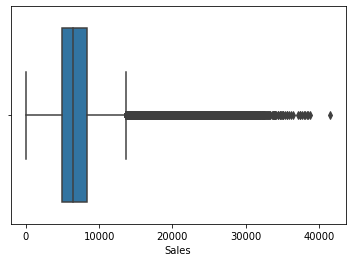

In [73]:
#Box plot of sales which detects outliers
sns.boxplot(merge_df_1['Sales'])


# **Using zscore**

In [74]:
outliers=[]
def detect_outliers(data):
  '''Function to get outliers
  using zscore'''
  threshold=3
  mean=np.mean(data)
  std=np.std(data)

  for i in data:
    z_score=(i - mean)/std
    if np.abs(z_score) > threshold:
      outliers.append(i)
  return outliers
     

In [75]:
#Getting all the outliers points
outliers_pt=detect_outliers(merge_df_1['Sales'])
outliers_pt

[18227,
 17286,
 22205,
 25774,
 19898,
 17867,
 16459,
 16556,
 17133,
 22129,
 17208,
 16964,
 16699,
 19959,
 17626,
 18197,
 20303,
 17879,
 18690,
 18933,
 18308,
 16625,
 25280,
 19274,
 18700,
 23093,
 17099,
 23996,
 16774,
 16273,
 18331,
 16726,
 27508,
 20061,
 22253,
 16912,
 16308,
 19194,
 17623,
 18577,
 16307,
 18741,
 16693,
 22177,
 20363,
 17357,
 24395,
 19230,
 21041,
 16304,
 16907,
 16949,
 16739,
 18350,
 17137,
 18568,
 16845,
 16762,
 18228,
 21556,
 22190,
 19989,
 25840,
 17134,
 20994,
 22442,
 17080,
 16625,
 17406,
 17790,
 17738,
 17894,
 16885,
 18491,
 17384,
 18939,
 17880,
 23248,
 21351,
 17021,
 18764,
 25518,
 17513,
 18048,
 17819,
 20013,
 20411,
 16404,
 19183,
 22185,
 16715,
 21337,
 20024,
 18385,
 18878,
 20541,
 16493,
 16992,
 19739,
 17395,
 18258,
 19045,
 19680,
 16584,
 18520,
 17596,
 16426,
 16578,
 17075,
 18104,
 17463,
 20328,
 18808,
 21319,
 23932,
 16327,
 17547,
 17912,
 27881,
 18785,
 20849,
 19537,
 26720,
 32547,
 20310,


Text(0.5, 1.0, 'Outliers of Sales')

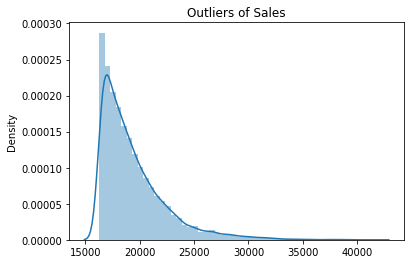

In [76]:
#Outliers plot using zscore method
sns.distplot(x=outliers)
plt.title("Outliers of Sales")

Text(0.5, 1.0, 'Distribution of Sales')

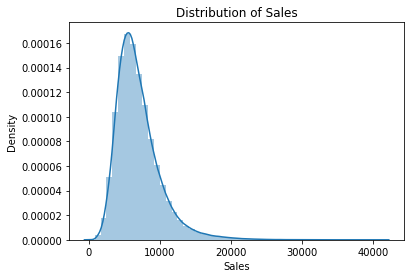

In [77]:
#distribution of "sales" column(after removing closed shop)
sns.distplot(merge_df_1['Sales'])
plt.title("Distribution of Sales")

In [78]:
#right skewed log transformation
merge_df_1['Sales_transformed']=np.log(merge_df_1['Sales'])


In [79]:
merge_df_1[merge_df_1['Sales_transformed'] == float("-inf")].shape

(54, 28)

In [80]:
merge_df_1.drop(merge_df_1[merge_df_1['Sales_transformed'] == float("-inf")].index,inplace=True)


In [81]:
merge_df_1.shape

(844338, 28)

Text(0.5, 1.0, 'Distribution of transformed Sales')

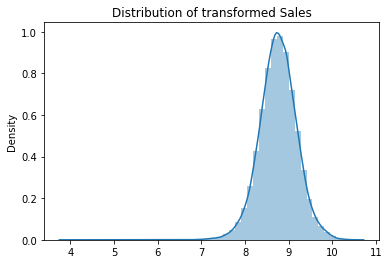

In [82]:
sns.distplot(x=merge_df_1['Sales_transformed'])
plt.title("Distribution of transformed Sales")

In [83]:
merge_df_1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Date-time', 'year', 'month', 'day',
       'current_week_number', 'competition_open', 'promo_2_open',
       'promo_intervel_open', 'IsPromo2Month', 'Sales_transformed'],
      dtype='object')

# **Data Preprocessing**

In [84]:
#Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(merge_df_1[input_col],merge_df_1[target_col], test_size=0.20, random_state=0)

In [85]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((675470, 17), (168868, 17), (675470,), (168868,))

In [86]:
merge_df_1[input_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                844338 non-null  int64  
 1   DayOfWeek            844338 non-null  int64  
 2   Customers            844338 non-null  int64  
 3   Promo                844338 non-null  int64  
 4   StateHoliday         844338 non-null  object 
 5   SchoolHoliday        844338 non-null  int64  
 6   year                 844338 non-null  int64  
 7   month                844338 non-null  int64  
 8   day                  844338 non-null  int64  
 9   current_week_number  844338 non-null  int64  
 10  StoreType            844338 non-null  object 
 11  Assortment           844338 non-null  object 
 12  CompetitionDistance  844338 non-null  float64
 13  Promo2               844338 non-null  int64  
 14  competition_open     844338 non-null  float64
 15  promo_2_open    

In [87]:
merge_df_1['StateHoliday'].value_counts()

0    843428
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

In [88]:
merge_df_1.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Date-time,year,month,day,current_week_number,competition_open,promo_2_open,promo_intervel_open,IsPromo2Month,Sales_transformed
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2015-07-31,2015,7,31,31,0.0,0.000000,0,0,8.568456
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2015-07-31,2015,7,31,31,56.0,64.131148,"[1, 4, 7, 10]",1,8.710125
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2015-07-31,2015,7,31,31,43.0,51.901639,"[1, 4, 7, 10]",1,9.025696
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2015-07-31,2015,7,31,31,0.0,0.000000,0,0,9.546455
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015-07-31,2015,7,31,31,0.0,0.000000,0,0,8.480944


In [89]:
#Splitting between numeric and categorial column
Numeric_column=['Store','Customers','Promo','year','month','day','current_week_number','CompetitionDistance',
                'Promo2','competition_open','promo_2_open','IsPromo2Month','SchoolHoliday']
Categorical_col=['StateHoliday','DayOfWeek','StoreType','Assortment' ]

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train[Numeric_column])
X_train_numeric=scaler.transform(X_train[Numeric_column])
X_test_numeric=scaler.transform(X_test[Numeric_column])


# **One hot encoding of categorical variables**

In [91]:
#Performing one hot encoding on categorical variables
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')
X_train_categorical=encoder.fit_transform(X_train[Categorical_col].astype(str))
x_test_categorical=encoder.fit_transform(X_test[Categorical_col].astype(str))

In [92]:
X_train_input = np.concatenate((X_train_numeric, X_train_categorical), axis = 1)


In [93]:
X_test_input=np.concatenate((X_test_numeric, x_test_categorical), axis = 1)

In [94]:
X_test_input.shape


(168868, 31)

In [95]:
y_train_input=np.array(y_train)


In [96]:
y_test_input=np.array(y_test)

# **Modeling**
# Assumption for linear regression

In [97]:
import statsmodels.api as sm

X_constant = sm.add_constant(X_train_input)
regr = sm.OLS(y_train_input,X_constant).fit()
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                 7.534e+04
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:45:29   Log-Likelihood:                 88549.
No. Observations:              675470   AIC:                        -1.770e+05
Df Residuals:                  675442   BIC:                        -1.767e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.576e+10   2.58e+10     -1.388      0.165   -8.63e+10    1.47e+10
x1            -0.0224      0.001    -24.982      0.000      -0.024      -0.021
x2             5.0674      0.004   1174.876      0.000       5.059       5.076
x3             0.2019      0.001    342.748      0.000       0.201       0.203
x4             0.0481      0.001     66.627      0.000       0.047       0.050
x5             0.0460      0.003     14.353      0.000       0.040       0.052
x6             0.0006      0.001      0.685      0.493      -0.001       0.002
x7             0.0039      0.003      1.133      0.257      -0.003       0.011
x8             0.2153      0.003     81.488      0.000       0.210       0.220
x9             0.0082      0.001     10.294      0.000       0.007       0.010
x10            0.0058      0.002      3.195      0.001       0.002       0.009
x11            0.0703      0.002     39.771      0.000       0.067       0.074
x12           -0.0037      0.001     -4.857      0.000      -0.005      -0.002
x13            0.0135      0.001     19.803      0.000       0.012       0.015
x14         1.978e+10   1.43e+10      1.388      0.165   -8.15e+09    4.77e+10
x15         1.978e+10   1.43e+10      1.388      0.165   -8.15e+09    4.77e+10
x16         1.978e+10   1.43e+10      1.388      0.165   -8.15e+09    4.77e+10
x17         1.978e+10   1.43e+10      1.388      0.165   -8.15e+09    4.77e+10
x18        -4.817e+09   3.47e+09     -1.388      0.165   -1.16e+10    1.98e+09
x19        -4.817e+09   3.47e+09     -1.388      0.165   -1.16e+10    1.98e+09
x20        -4.817e+09   3.47e+09     -1.388      0.165   -1.16e+10    1.98e+09
x21        -4.817e+09   3.47e+09     -1.388      0.165   -1.16e+10    1.98e+09
x22        -4.817e+09   3.47e+09     -1.388      0.165   -1.16e+10    1.98e+09
x23        -4.817e+09   3.47e+09     -1.388      0.165   -1.16e+10    1.98e+09
x24        -4.817e+09   3.47e+09     -1.388      0.165   -1.16e+10    1.98e+09
x25         5.819e+09   4.19e+09      1.388      0.165    -2.4e+09     1.4e+10
x26         5.819e+09   4.19e+09      1.388      0.165    -2.4e+09     1.4e+10
x27         5.819e+09   4.19e+09      1.388      0.165    -2.4e+09     1.4e+10
x28         5.819e+09   4.19e+09      1.388      0.165    -2.4e+09     1.4e+10
x29         1.498e+10   1.08e+10      1.388      0.165   -6.17e+09    3.61e+10
x30         1.498e+10   1.08e+10      1.388      0.165   -6.17e+09    3.61e+10
x31         1.498e+10   1.08e+10      1.388      0.165   -6.17e+09    3.61e+10
==============================================================================
Omnibus:                   127826.158   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           506829.777
Skew:                          -0.902   Prob(JB):                         0.00
Ku

# **1) Linear Regression**

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import math


In [99]:
regressor = LinearRegression()
regressor.fit(X_train_input, y_train_input)

LinearRegression()

In [100]:
regressor.intercept_

-10192212834.66456

In [101]:
regressor.coef_

array([-2.24279829e-02,  5.06735664e+00,  2.01876955e-01,  4.81167890e-02,
        4.60564235e-02,  6.26863395e-04,  3.86466185e-03,  2.15265418e-01,
        8.19458889e-03,  5.80761284e-03,  7.02430482e-02, -3.74309576e-03,
        1.34869307e-02,  3.61084527e+07,  3.61084526e+07,  3.61084525e+07,
        3.61084530e+07, -3.97628967e+08, -3.97628967e+08, -3.97628967e+08,
       -3.97628967e+08, -3.97628967e+08, -3.97628967e+08, -3.97628967e+08,
        5.95421975e+09,  5.95421975e+09,  5.95421975e+09,  5.95421975e+09,
        4.59951360e+09,  4.59951360e+09,  4.59951360e+09])

In [102]:
y_pred_train = regressor.predict(X_train_input)


In [103]:
y_pred = regressor.predict(X_test_input)